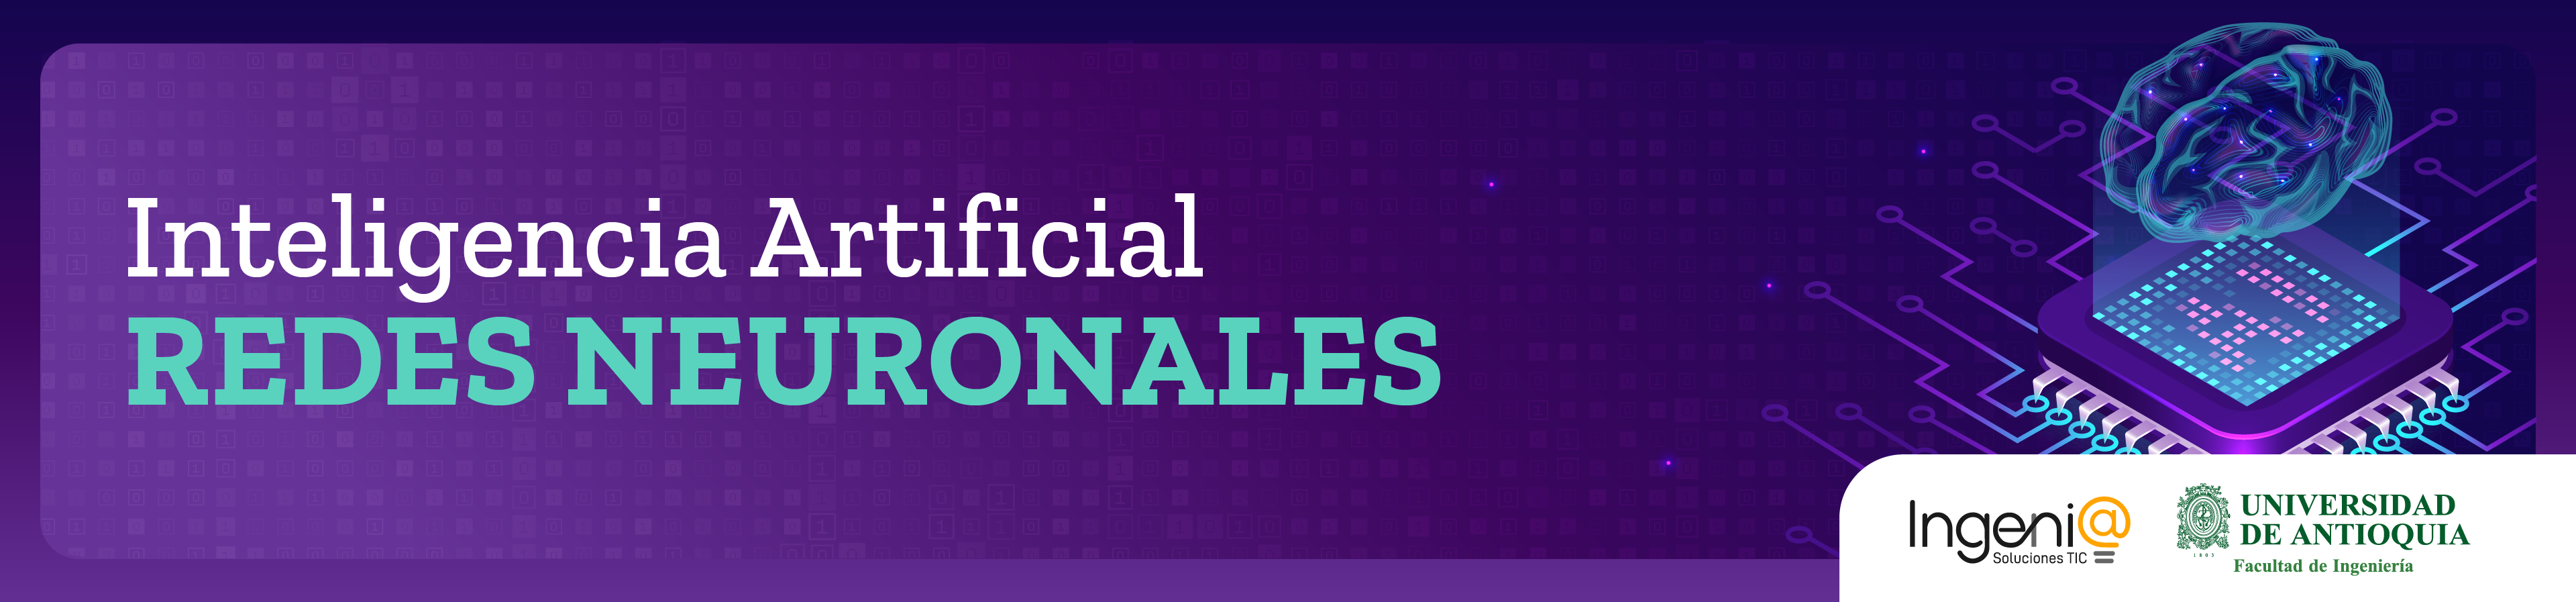

# $Sobreajuste$ y $Regularización$

## ¿Qué es overfitting y underfitting?

$overfitting$ "sobreajuste" y $underfitting$  "subajuste", hacen referencia al fallo del modelo al generalizar.

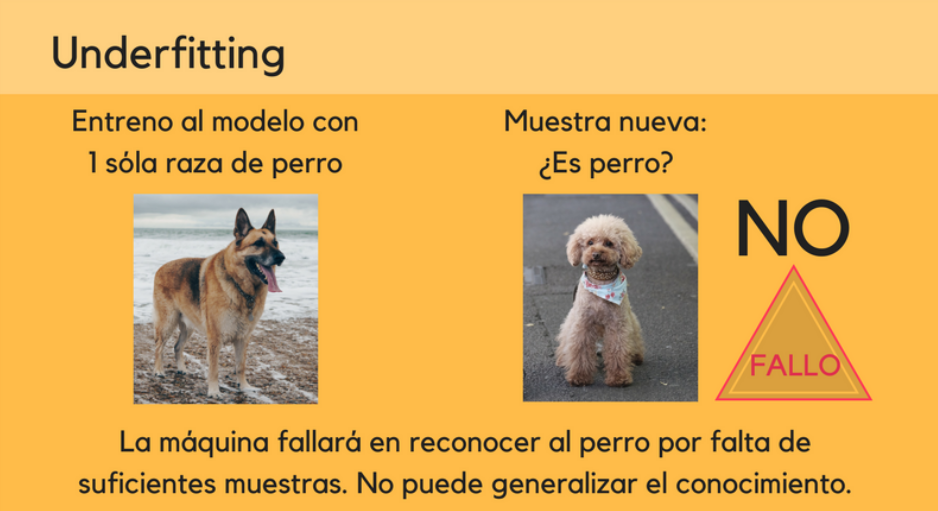

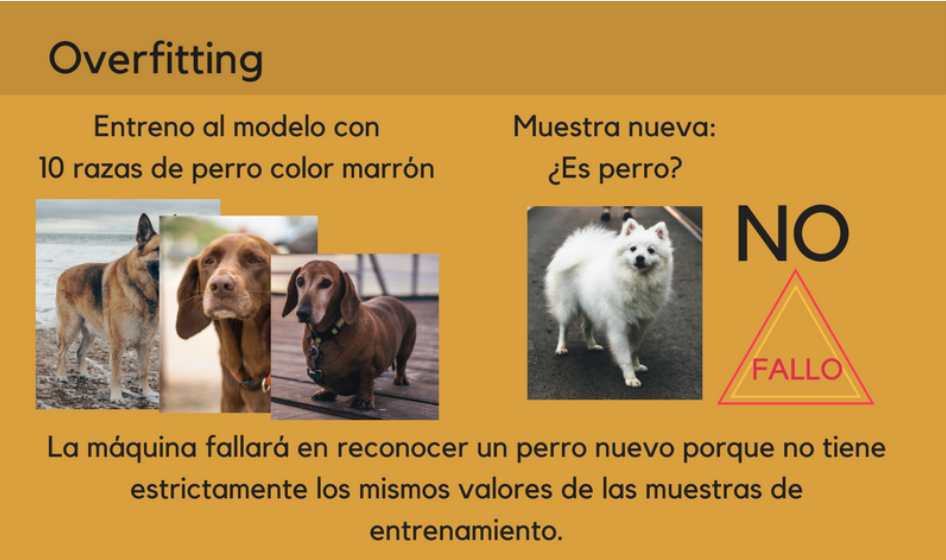

Fuente: https://www.aprendemachinelearning.com/

## $Overfitting$ en Machine Learning
Es muy común que en los inicios del aprendizaje en machine learning se caiga en el problema del $Overfitting$. Lo que ocurrirá es que la máquina sólo se ajustará a aprender los casos particulares que le enseñó en el entrenamiento (train) y será incapaz de reconocer nuevos datos de entrada (test).

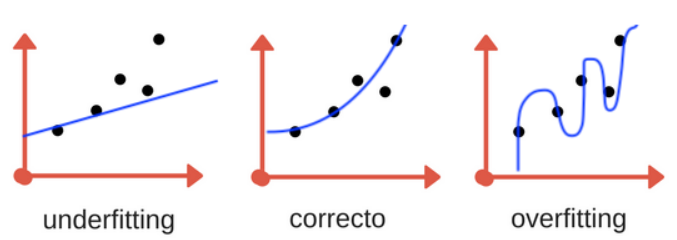

Fuente: https://www.aprendemachinelearning.com/

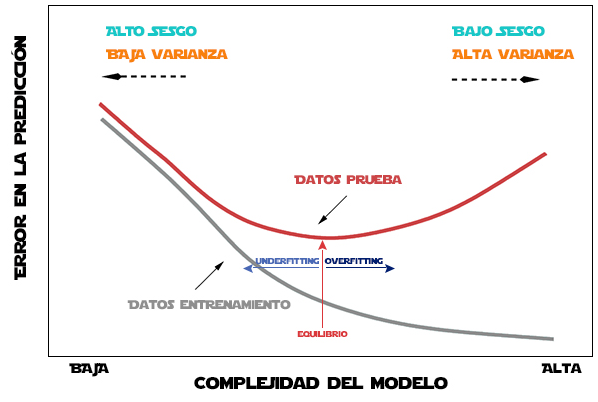

Fuente: https://koldopina.com/equilibrio-varianza-sesgo/

## Prevenir el $overfitting$ de datos

1. Trabajas las etapas de __train__ y __test__ con la mayor cantidad de muestras posible. IA no hay un mínimo ni un máximo de muestras, pero entre más muestras mejor se comporta en modelo.
2. Sean problemas biclases o multiclase, preferiblemente que el número de muestras por clase sea similar.
3. Conjunto de Test de datos.
4. Parameter Tunning o Ajuste de los Parámetros de modelo que se esté trabajando, para el caso de redes neuronales, número de cápas, número de neuronas por capas, dropout, etc.
5. La maldición de dimensionalidad, preferiblemente evitar que el número de variables que se ingresan al modelo sean menor mayor que el número de muestras existentes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session

In [ ]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print(X_train.shape, y_train_oh.shape)

In [ ]:
del model3
model3 = Sequential()
model3.add(Dense(50, activation='relu', input_dim=X.shape[1]))
model3.add(Dense(30, activation='relu'))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy')
model3.reset_states()
model3.summary()

In [ ]:
model3.fit(X_train, y_train_oh, epochs=200, batch_size=32, validation_data=(X_test, y_test_oh))

In [ ]:
plt.figure(figsize=(20,8))
loss  = model3.history.history["loss"]
vloss = model3.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();